In [3]:
import torch
import torchvision 
import matplotlib.pyplot as plt 
from torchinfo import summary
from torchvision import transforms 

torch.__version__

'2.4.0'

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current device: {device}")

Current device: cuda


In [10]:
# get data 
from data_setup import download_data

image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip", destination="pizza_steak_sushi", remove_source=True)
image_path

[INFO] Did not find data\pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


WindowsPath('data/pizza_steak_sushi')

In [11]:
# setup directory paths for training and testing 
train_dir = image_path / "train"
test_dir = image_path / "test"

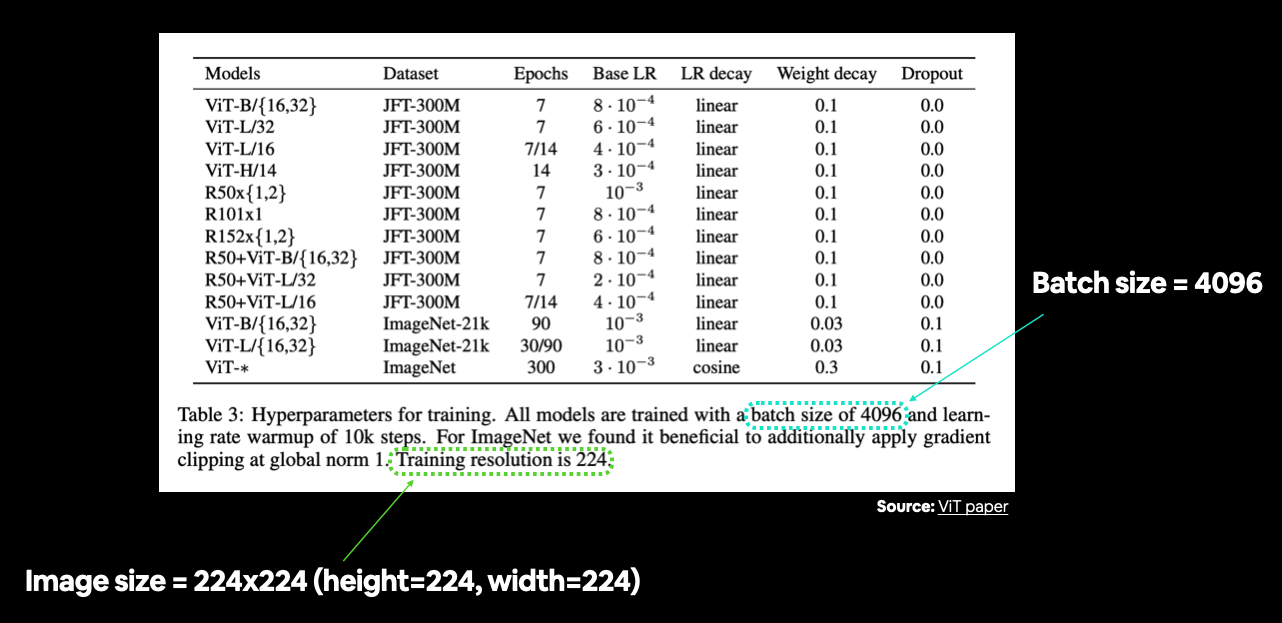

In [12]:
# setup image_size for transform according to table 3
IMAGE_SIZE = 224

manual_transform = transforms.Compose([
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

We're using the pin_memory=True parameter in the create_dataloaders() function to speed up computation. pin_memory=True avoids unnecessary copying of memory between the CPU and GPU memory by "pinning" examples that have been seen before. Though the benefits of this will likely be seen with larger dataset sizes (our FoodVision Mini dataset is quite small).

In [13]:
# setup dataloaders for training and testing with batchsize of 32 (because we're working with small datasets)
from data_setup import create_dataloaders 
BATCH_SIZE = 32 

train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=train_dir, test_dir=test_dir, train_transform=manual_transform, test_transform=manual_transform, batch_size=BATCH_SIZE)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1e514a2d850>,
 ['pizza', 'steak', 'sushi'])

In [16]:
# take a look at one sample image 
image_batch, label_batch = next(iter(train_dataloader))
img, label = image_batch[0], label_batch[0]

# see the shape of the image 
img.shape

torch.Size([3, 224, 224])

Text(0.5, 1.0, 'sushi')

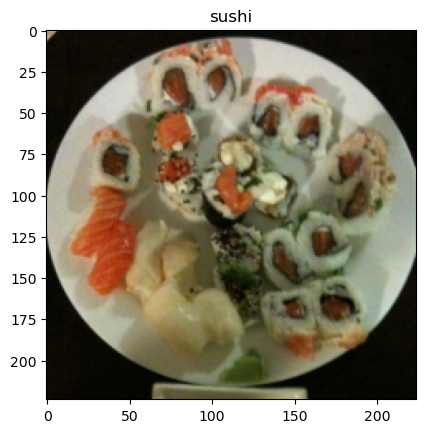

In [18]:
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label.item()])